# **최적화**

- 최적화 문제
  - 함수의 값을 가장 크게 혹은 작게 만드는 입력변수의 값을 찾는 문제
  - 모든 데이터 분석은 주어진 기준에 가장 적합한 수식을 찾는다는 점에서 일종의 최적화 문제를 푸는 과정이라고 볼 수 있음

- 가장 기본적인 최적화 방법
  - 그리드 서치(grid search): 일정 범위의 입력변숫값들을 모두 계산하는 방법
    - 입력변수의 수가 많거나 함수 계산에 시간이 오래 걸리는 경우에는 그리드 서치 방법이 현실적으로 불가능함
    - 가능한 한 적은 횟수로 함수를 계산하는 수치적 최적화 방법을 사용

- 최대경사법(steepest gradient method, ==최급강하법)
  - 수치적 최적화 방법 중 가장 단순한 방법
  
- 뉴튼 방법(Newton method)
  - 최대경사법을 개선한 것

- 현실의 최적화 문제
  - 보통 추가적인 제한조건이 포함됨
  - 제한조건
    - 등식 제한조건: 입력변수의 값이 특정한 연립방정식을 만족해야 함
      - 실습에서는 라그랑주 승수법을 이용함
    - 부등식 제한조건: 입력변수의 값이 특정한 연립부등식을 만족해야 함
      - 실습에서는 KKT 조건을 이용함


In [6]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm

In [8]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,521 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [9]:
# 나눔바른고딕 폰트 설치 - 런타임 연결이 다시 될 때마다 다시 폰트를 설치해야 한글이 보인다.

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

## **1. 최적화 기초**

- 데이터 분석의 최종 단계는 가장 적합한 숫자를 찾아내는 최적화 단계

### 1-1. 최적화 문제

- 함수 $f$의 값을 최대화 혹은 최소화하는 변수 $x$의 값 $x∗$를 찾는 것
  - 수식표현: 
    - $x^* = argmax_x f(x)$
    - $x^* = argmin_x f(x)$

  - $x^*$ : 최적화 문제의 해
  - 만약 최소화 문제를 풀 수 있다면 $f(x)$를 $−f(x)$로 바꾸어 위아래를 뒤집은 다음 최소화 문제를 풀면 $f(x)$의 최대화 문제를 푼 것과 같음. 따라서 보통은 최소화 문제만 고려함
  - 이 때, 최소화하려는 함수 f(x)를 목적함수(objective function), 비용함수(cost function), 손실함수(loss function) 오차함수(error function) 등으로 부르며, 기호로는 각각 J,C,L,E로 표기하는 경우가 많음

- 1차원 목적함수의 예
  - 그래프에서 이 목적함수 $f_1(x)$의 최저점은 $x^∗=2$임을 알 수 있음

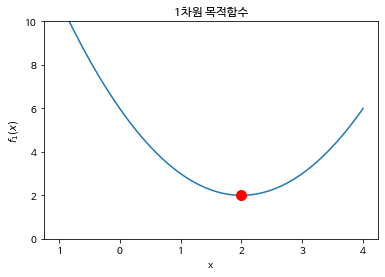

In [11]:
def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

-  2차원 목적함수의 예
  - 2차원 로젠브록(Rosenbrock) 함수: $x^∗, y^∗ = (1, 1)$ 에서 최솟값을 가짐
  - $f(x, y)=(1−x)^2+100(y−x^2)^2$

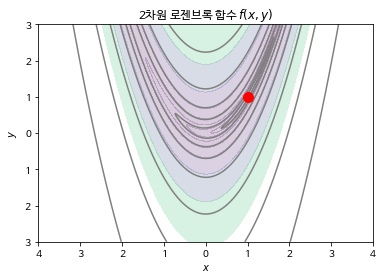

In [10]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브록 함수 $f(x,y)$")
plt.show()

### 1-2. 그리드 서치(Grid Search)
- 가능한 x의 값을 여러개 넣어 보고 그중 가장 작은 값을 선택하는 것
- 목적함수의 값을 가장 작게 하는 x 위치를 찾는 최적화 문제를 푸는 가장 간단한 방법임
- 함수 f1(x)의 그래프를 그려 최저점을 찾는 방법도 그리드 서치 방법의 일종
- 그리드 서치는 가장 간단한 방법이지만 많은 x 위치에 대해 목적함숫값을 계산해야 함
- 위에서 함수 f1(x)의 최저점을 찾을 때는 사실 함수 계산을 100번 수행했음

### 1-3. 수치적 최적화(Numerical Optimization)
- 반복적 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 값 x∗를 찾는 방법
- 수치적 최적화 방법은 함수 위치가 최적점이 될 때까지 가능한 한 적은 횟수만큼 x 위치를 옮기는 방법을 말함
- 수치적 최적화가 요구되는 이유
  - 예측 모형을 만들 때 목적함숫값, 즉 예측 오차를 구하려면 모든 트레이닝 데이터 집합에 대해 예측값과 타깃값의 차이를 구해야 하므로 계산량이 상당히 큼
  - 따라서 그리드 서치보다 목적함수 계산을 적게 할 수 있는 방법이 필요함
- 수치적 최적화 방법이 요구하는 두 가지 알고리즘
  - 현재 위치 xk가 최적점인지 판단하는 알고리즘
  - 어떤 위치 xk를 시도한 뒤, 다음 번에 시도할 위치 xk+1을 찾는 알고리즘

### 1-4. 기울기 필요조건
- 우선 현재 시도하고 있는 위치 $x$가 최소점인지 아닌지 알아내는 알고리즘을 생각해 보자.
  - 어떤 독립 변수 값 $x^∗$가 최소점이려면 일단 다음과 같이 값 $x^∗$에서 함수의 기울기(slope)와 도함수 ${df}\over{dx}$ 값이 0이라는 조건을 만족해야 하며 이를 기울기 필요조건이라고 함
  - 단일 변수에 대한 함수인 경우, 미분값이 0이어야 함
    - ${{df(x)}\over{dx}}=0$
  - 다변수 함수인 경우 모든 변수에 대한 편미분값이 0이어야 함

     \begin{align}{{{∂f(x_1,x_2,⋯,x_N)}\over{∂x_1}}=0} \\\ {{{∂f(x_1,x_2,⋯,x_N)}\over{∂x_2}}=0} \\\ ⋮ \\\ {{{∂f(x_1,x_2,⋯,x_N)}\over{∂x_N}}=0}\end{align}
    - 즉 $∇f=0$
  - 이때 그레디언트(gradient) 벡터 $∇f$를 $g$라는 기호로 간단하게 나타내기도 함

    - $g=0$
  - 이 조건을 필요조건이라고 하는 이유는 기울기가 0이라고 반드시 최소점이 되지는 않지만, 모든 최소점은 기울기가 0이기 때문임
  - 일반적인 수치적 최적화 알고리즘에서는 기울기 필요조건을 이용하여 최적점에 도달했는지 판단함

- 기울기가 0이어도 최소점이 아니라 최고점일 수도 있음
  - 기울기가 0인 위치가 최소점임을 확인하려면 2차 도함수의 부호도 계산해야 함
  - 기울기가 0이고 2차도함수가 양수면 최소점
  - 반대로 기울기가 0이고 2차 도함수가 음수면 최대점

### 1-5. 최대경사법(Steepest Gradient Descent)
- 최대경사법은 단순히 현재 위치 $x_k$에서의 기울기 값 $g(x_k)$ 만을 이용하여 다음번 위치 $x_{k+1}$를 결정하는 방법
- $x_{k+1}=x_{k−μ}∇f(x_k)=x_k−μg(x_k)$
- 만약 현재 위치 $x_k$에서 기울기가 음수면 즉 곡면이 아래로 향하면 $g(x_k)<0$이므로 앞으로 진행하고 현재 위치 $x_k$에서 기울기가 양수면 $g(x_k)>0$이므로 뒤로 진행하게 되어 점점 낮은 위치로 옮겨감
- 이때 위치를 옮기는 거리를 결정하는 비례상수 $μ$를 스텝 사이즈(step size) 라고 함

- $x_k$가 일단 최적 점에 도달했을 때는 $g(x_k)=0$이 되므로 더 이상 위치를 옮기지 않음

- 예제
  - 위에서 예로 든 1차원 목적함수를 이 방법으로 최적화하면..

In [12]:
def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 1.60, g_2 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16


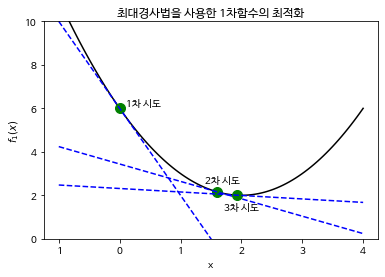

In [14]:
# x=0 에서 시작하여 최대경사법으로 최적점을 찾아나가는 과정

xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화")
plt.ylim(0, 10)
plt.show()

- 최대경사법에서는 스텝 사이즈의 크기를 적절히 조정하는 것이 중요함
- 보통 스텝 사이즈를 사용자가 경험적으로 얻는 값으로 고정하거나 특정한 알고리즘에 따라 변화시킴
- 그러나 스텝 사이즈가 너무 작으면 최저점을 찾아가는데 시간이 너무 오래 걸리고 스텝 사이즈가 너무 크면 다음 그림과 같이 오히려 최저점에서 멀어지는 현상이 발생할 수 있음

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 4.40, g_2 = 4.80
3차 시도: x_3 = -0.88, g_3 = -5.76


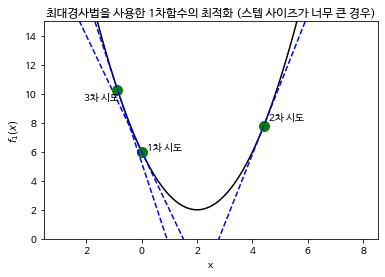

In [15]:
xx = np.linspace(-3, 8, 100)

plt.plot(xx, f1(xx), 'k-')

# step size (너무 큰 값!)
mu = 1.1

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 1.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.ylim(0, 15)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화 (스텝 사이즈가 너무 큰 경우)")
plt.show()

- 예제
  - 2차원 Rosenbrock 함수에 대해 최대경사법을 적용하기
    - 목적함수를 미분하여 도함수를 구한 다음 그레디언트 벡터를 파이썬 함수로 구현

In [16]:
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

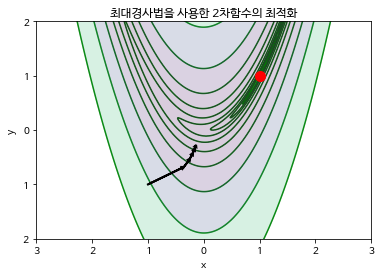

In [17]:
# x=−1,y−1에서 시작하여 최대경사법으로 최적점을 찾아나가는 과정

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화")
plt.show()

- 최적화 결과는 시작점의 위치나 스텝 사이즈 등에 따라 크게 달라짐
- 최대경사법 방법은 곡면의 모양이 계곡(valley)과 같이 생긴 경우, 즉 그레디언트 벡터가 최저점을 가리키고 있지 않는 경우에는 진동(oscillation) 현상이 발생하므로 수렴하기까지 시간이 오래 걸릴 수 있음

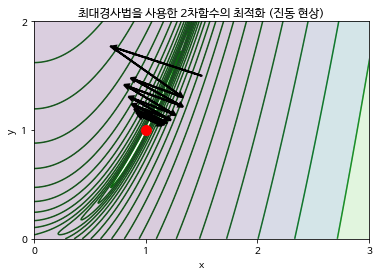

In [18]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)")
plt.show()

- 진동 현상을 없앨 수 있는 방법
  - 2차 도함수, 즉 헤시안 행렬을 이용하는 방법
  - 모멘텀 방법(momentum)
    - 모멘텀 방법은 진행 방향으로 계속 진행하도록 성분(모멘텀)을 추가하는 것
- 일반적인 경우에는 2차 도함수를 이용하는 방법을 사용하고 2차 도함수를 계산하기 어려운 인공신경망 등에서는 모멘텀 방법을 선호함

### 1-6. 2차 도함수를 사용한 뉴턴 방법

- 뉴턴(Newton) 방법은 목적함수가 2차 함수라는 가정하에 한 번에 최저점을 찾음
- 그레디언트 벡터에 헤시안 행렬의 역행렬을 곱해서 방향과 거리가 변형된 그레디언트 벡터를 사용함

- $x_{n+1}=x_n−[Hf(x_n)]−1∇f(x_n)$

- 스텝 사이즈가 필요없고 목적함수가 실제로 2차함수와 비슷한 모양이면 빨리 수렴할 수 있다는 장점이 있지만 1차 도함수(그레디언트 벡터)뿐 아니라 2차 도함수(헤시안 행렬)도 필요로 함

- 예시
  - 다음 단변수 2차 함수 $f(x)=a(x−x_0)^2+c=ax^2−2ax_0x+x^2_0+c$ 는 $x=x_0$에서 최솟값을 가짐

- 단변수함수 뉴턴 방법은 다음과 같으며 최적의 스텝 사이즈가 ${1}\over{f''(x_n)}$이라는 것을 보여줌

- $x_{n+1}=x_n−{f'(x_n)}\over{f''(x_n)}$

- 2차 함수에 대해 도함수와 2차 도함수가 $f'(x)=2ax−2ax_0$, $f''(x)=2a$ 이므로 뉴턴 방법에 적용하면 $x_{n+1}={{x_n−2ax_n−2ax_0}\over{2}a}=x_n−(x_n−x_0)=x_0$ 이므로 어떤 점 xn에서 시작해도 바로 최저점으로 이동함

### 1-7. 준 뉴턴 방법

- 뉴턴 방법의 장단점
  - 장점: 목적함수가 2차 함수와 비슷한 모양을 가진 경우에 빠르게 수렴할 수 있음
  - 단점: 2차도함수인 헤시안 행렬 함수를 사람이 미리 구현해야 하고 함수의 모양에 따라서는 잘 수렴하지 않을 수도 있음
  
- 준 뉴턴(Quasi-Newton) 방법
  - 사람이 구한 헤시안 행렬 함수를 사용하는 대신 현재 시도하고 있는 $x_n$ 주변의 몇몇 점에서 함수의 값을 구하고 이를 이용하여 2차 도함수의 근사값 혹은 이에 상응하는 정보를 수치적으로 계산함
  - 준 뉴턴 방법 중에서 BFGS(Broyden–Fletcher–Goldfarb–Shanno) 방법이 많이 사용됨
- CG(conjugated gradient) 방법은 준 뉴턴 방법처럼 헤시안 행렬을 필요로 하지 않고 변형된 그레디언트 벡터를 바로 계산함

### 1-8. SciPy를 이용한 최적화

- 사이파이(SciPy)의 optimize 서브 패키지
  - 최적화 명령 minimize()를 제공
  - 세부적인 알고리즘은 method 인수로 선택
  - 디폴트 알고리즘은 BFGS 방법
  - minimize() 명령은 최적화할 함수와 최적화를 시작할 초깃값을 인수로 받음
  

- 예제
  - minimize() 명령으로 위에서 예로 들었던 1차원 함수를 최적화하기

In [23]:
import scipy as sp
from scipy import optimize

In [24]:
# 목적함수 재정의
def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0  # 초깃값
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


- 이 결과를 보면 
  - 최적해를 찾기 전에 x값의 위치는 2번밖에 바뀌지 않았지만 함수 호출 횟수는 9번
  - 그 이유는 그레디언트 계산에 필요한 1차 미분(그레디언트 벡터) 함수나 헤시안 함수가 주어지지 않았기 때문에 x값의 위치 근처에서 여러 번 함수를 계산하여 그레디언트 벡터의 근사값을 찾는 방법을 쓰기 때문
  - 이를 막고 계산량을 줄이려면 사람이 직접 그레디언트 벡터값을 반환하는 함수를 만들어 jac 인수로 넣어주면 됨

In [25]:
def f1p(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


- 예제
  - 다변수 함수를 최적화하는 경우에는 목적함수가 벡터 인수를 가져야 함

In [26]:
# 2차원 목적함수 재정의(벡터 입력을 받도록)
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 1.2197702024999478e-11
 hess_inv: array([[0.50957143, 1.01994476],
       [1.01994476, 2.04656074]])
      jac: array([ 9.66714798e-05, -4.64005023e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 342
      nit: 57
     njev: 110
   status: 2
  success: False
        x: array([0.99999746, 0.99999468])


- 최적화에 성공하지 못하는 경우도 있기 때문에 성공 여부를 확인하고 최적화 결과를 이용해야 함

### 1-9. 전역 최적화 문제

- 만약 최적화하려는 함수가 복수의 국소 최저점(local minima)을 가지고 있는 경우
  - 수치적 최적화 방법으로 전역 최저점(global minimum)에 도달한다는 보장이 없음
  - 결과는 초기 추정값 및 알고리즘, 파라미터 등에 의존함

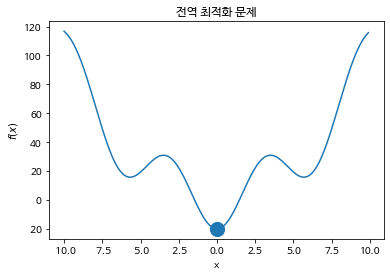

In [27]:
def f_global(x):
    """비선형 목적함수"""
    return x**2 - 20 * np.cos(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f_global(x))
plt.scatter(0, f_global(0), s=200)
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.title("전역 최적화 문제")
plt.show()

- 초깃값이 좋지 않아서 전역 최저점으로 수렴하지 못하는 경우

In [28]:
result = sp.optimize.minimize(f_global, 4)
print(result)
x_sol = result['x']
x_sol

      fun: 15.791736781359312
 hess_inv: array([[0.05417267]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([5.67920777])


array([5.67920777])

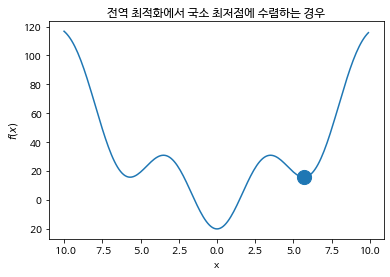

In [29]:
plt.plot(x, f_global(x));
plt.scatter(x_sol, f_global(x_sol), s=200)
plt.title("전역 최적화에서 국소 최저점에 수렴하는 경우")
plt.ylabel("$f(x)$")
plt.xlabel("x")
plt.show()

### 1-10. 컨벡스(Convex) 문제

- 목적함수의 2차 도함수의 값이 항상 0 이상이 되는 영역에서만 정의된 최적화 문제
  - ${{∂^2f}\over{∂x^2}}≥0$

- 다변수 목적함수의 경우에는 주어진 영역에서 헤시안 행렬이 항상 양의 준정부호(positive semidefinite)이라는 조건이 됨
  - $x^THx≥0$ for all $x$

- 컨벡스 문제에서는 항상 전역 최저점이 존재함

In [30]:
def f2prime(x):
    return np.array([2 * (x[0] - 1) + 400 * x[0] * (x[0]**2 - x[1]),
                     200 * x[1] * (x[1] - x[0]**2)])

result = sp.optimize.minimize(f2, (2, 0.3), jac=None)
print(result)

      fun: 2.0894341548127262e-11
 hess_inv: array([[0.49022117, 0.98027058],
       [0.98027058, 1.96519149]])
      jac: array([ 1.58933954e-06, -8.86397000e-07])
  message: 'Optimization terminated successfully.'
     nfev: 75
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])


## **2. 제한 조건이 있는 최적화 문제**

- 제한조건(constraint)을 가지는 최적화 문제
- 제한조건: 연립방정식 또는 연립부등식
  - 연립방정식 제한조건이 있는 경우: 라그랑주 승수법을 사용하여 새로운 최적화 문제를 풀어야 함
  - 연립부등식 제한조건의 경우: KKT 조건이라는 것을 만족하도록 하는 복잡한 과정을 거쳐야 함

### 2-1. 등식 제한조건이 있는 최적화 문제

- 현실의 최적화 문제에서는 여러가지 제한조건이 있는 최적화(constrained optimization) 문제가 많음
- 가장 간단한 경우는 다음과 같이 연립방정식 제한조건이 있는 경우(등식(equality) 제한조건이라고도 함)
  \begin{align} x^∗=argmin_x f(x) \\ x∈R^N \\ g_j(x)=0(j=1,…,M)\end{align}
- 첫 번째 식만 보면 단순히 목적함수 f(x)를 가장 작게 하는 N차원 벡터 x값을 찾는 문제
- 그러나 마지막 식에 있는 M개의 등식 제한 조건이 있으면 M개 연립 방정식
  \begin{align}g_1(x)=0 \\ g_2(x)=0 \\ ⋮ \\ g_M(x)=0\end{align}
  를 동시에 모두 만족시키면서 목적함수 f(x)를 가장 작게 하는 x값을 찾아야 함

- 예제
  - 목적 함수 $f$와 등식 제한조건 $g$이 다음과 같은 경우
  \begin{align} f(x_1,x_2)=x^2_1+x^2_2 \\ g(x_1,x_2)=x_1+x_2−1=0 \end{align}
  - 이 문제는 다음 그림처럼 $g(x_1,x_2)=0$으로 정의되는 직선상에서 가장 $f(x_1,x_2)$값이 작아지는 점 $(x^∗_1,x^∗_2)$를 찾는 문제가 됨

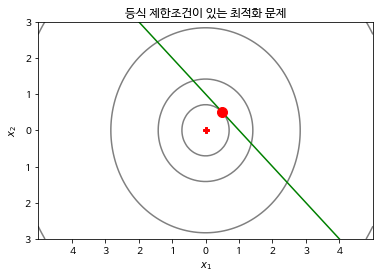

In [31]:
# 목적함수 f(x) = x1^2 + x2^2
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# 등식 제한조건 방정식 g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1

plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("등식 제한조건이 있는 최적화 문제")
plt.show()

### 2-2. 라그랑주 승수법

- 등식 제한조건이 있는 최적화 문제는 **라그랑주 승수법(Lagrange multiplier)**을 사용하여 최적화할 수 있음

- 라그랑주 승수 방법에서는 목적함수를 원래의 목적함수 f(x)를 사용하지 않음

- 대신 제한조건 등식에 λ라는 새로운 변수를 곱해서 더한 함수

$h(x,λ)=h(x_1,x_2,…,x_N,λ_1,…,λ_M)=f(x)+∑_{j=1}^M λ_jg_j(x)$

를 목적함수로 간주하여 최적화함
- 이때 제한조건 등식 하나마다 새로운 λi를 추가해주어야 함
- 따라서 만약 제한조건이 M개이면 $λ_1,⋯,λ_M$개의 변수가 새로 생긴 것과 같음
- 이렇게 확장된 목적함수 $h$는 입력변수가 더 늘어났기 때문에 그레디언트 벡터를 영벡터로 만드는 최적화 필요 조건이 다음처럼 $N+M$개가 됨

<center><img src='https://drive.google.com/uc?export=download&id=1ffUny7HNJrxFN5msvOw5ZfKwQ6LswMEj' width="250" height ="" /></center><br /><br />

- 이 $N+M$개의 연립 방정식을 풀면 $N+M$개의 미지수 $x_1,x_2,…,x_N,,λ_1,…,λ_M$ 를 구할 수 있음
- 구한 결과에서 $x_1,x_2,⋯,x_N$ 이 우리가 찾는 최소값 $x$이며 라그랑주 승숫값은 필요없음

- 예제
  - 위에서 제시한 예제를 라그랑주 승수법으로 풀어보자. 새로운 목적함수는 다음과 같다.
  - $h(x_1,x_2,λ)=f(x_1,x_2)+λg(x_1,x_2)=x^2_1+x^2_2+λ(x_1+x_2−1)$
  - 라그랑주 승수법을 적용하여 그레디언트 벡터가 영벡터인 위치를 구한다.<br>
  ${{∂h}\over{∂x_1}}=2x1+λ=0 \\ {{∂h}\over{∂x_2}}=2x_2+λ=0 \\ {{∂h}\over{∂λ}}=x_1+x_2−1=0$

  - 위 방정식을 풀면 해는 다음과 같다.<br>
  $x_1=x_2={{1}\over{2}}$, $λ=-1$

### 2-3. SciPy를 사용하여 등식 제한조건이 있는 최적화 문제 계산하기

- SciPy의 optimize 서브패키지는 제한조건이 있는 최적화 문제를 푸는 fmin_slsqp() 명령을 제공
- fmin_slsqp() 명령은 목적함수와 초깃값, 그리고 제한조건 함수의 리스트를 인수로 받는다. 목적함수는 배열인 인수를 받도록 구현되어야 하고 제한조건 함수의 경우에는 항상 eqcons 인수를 명시해야 함

- 예제
  - 위의 예제를 fmin_slsqp() 명령으로 풀기

In [32]:
def f1array(x):
    return x[0] ** 2 + x[1] ** 2


def eq_constraint(x):
    return x[0] + x[1] - 1


sp.optimize.fmin_slsqp(f1array, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


array([0.5, 0.5])

### 2-4. 라그랑주 승수의 의미

- 만약 최적화 문제에서 등식 제한조건 gi이 있는가 없는가에 따라 해의 값이 달라진다면 이 등식 제한조건에 대응하는 라그랑주 승수 λi는 0이 아닌 값이어야 함

    - $λ_i≠0$

- $λ_i=0$일 때만 원래의 문제와 제한조건이 있는 문제의 최적화 조건이 같아지므로 최적화 해의 위치도 같게 나오기 때문임

### 2-5. 부등식 제한 조건이 있는 최적화 문제

- 다음과 같이 부등식(inequality) 제한조건이 있는 최적화 문제

- 예제
  - 부등식 제한조건을 가지는 최적화의 예를 풀어보자. 목적 함수는 $f(x_1,x_2)=x^2_1+x^2_2$이다.

  - 이 예제에서는 두가지 제한 조건을 고려해볼 텐데 하나는 다음 그림 중 왼쪽 그림처럼 부등식 제한조건이 $g(x_1,x_2)=x_1+x_2−1≤0$ 이다.
  - 다른 하나는 오른쪽 그림처럼 부등식 제한조건이 $g(x_1,x_2)=−x_1−x_2+1≤0$ 인 경우다. 

  - 그림에서는 제한조건을 만족하는 영역을 어둡게 표시
  - 최적점의 위치는 점으로 표시
  - 첫 번째 제한조건의 경우에는 부등식 제한조건이 있기는 하지만 원래의 최적화 문제의 해가 부등식 제한조건이 제시하는 영역 안에 있기 때문에 최적점의 위치가 달라지지 않는다. 
  - 두 번째 제한조건의 경우에는 원래의 최적화 문제의 해가 부등식 제한조건이 제시하는 영역 바깥에 있기 때문에 최적점의 위치가 달라졌다. 
  - 하지만 최적점의 위치가 영역의 경계선(boundary line)에 있다는 점에 주의

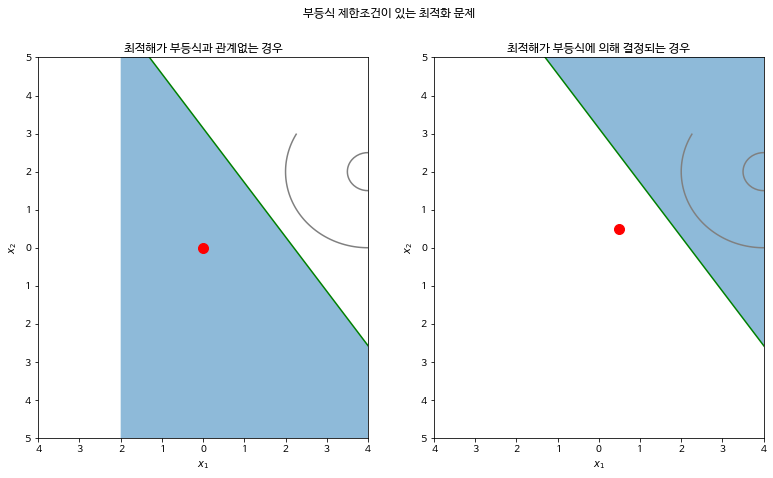

In [36]:
plt.figure(figsize=(13, 7))
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식과 관계없는 경우")
ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)
plt.xlabel("x_1")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-5, 5, 11))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("최적해가 부등식에 의해 결정되는 경우")
plt.suptitle("부등식 제한조건이 있는 최적화 문제")
plt.show()

- 예제
  - 다음은 복수의 부등식 제한조건이 있는 또다른 2차원 최적화 문제의 예다."

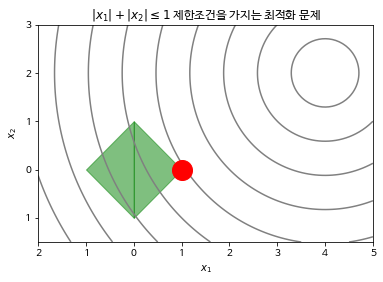

In [34]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)


x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray",
            levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

# 제한 조건의 상수
k = 1
ax = plt.gca()
x12 = np.linspace(-k, 0, 10)
x13 = np.linspace(0, k, 10)
ax.fill_between(x12, x12 + k, -k - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - k, k - x13, color='g', alpha=0.5)

# 최적점 위치
x1_sol = 1
x2_sol = 0
plt.plot(x1_sol, x2_sol, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$|x_1| + |x_2| \leq {}$ 제한조건을 가지는 최적화 문제".format(k))
plt.show()

### 2-6. SciPy를 사용하여 부등식 제한조건이 있는 최적화 문제 계산하기

- fmin_slsqp() 명령은 이렇게 부등식 제한조건이 있는 경우에도 사용할 수 있다. 제한조건 인수의 이름이 ieqcons로 달라졌다.
- 단 ieqcons 인수에 들어가는 부등호의 부호는 우리가 지금까지 사용한 방식과 달리 0 또는 양수이어야 한다.
  - $g≥0$
- fmin_slsqp() 명령은 등식 제한조건과 부등식 제한조건을 동시에 사용할 수 있다.

In [33]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.6055512804550336
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


array([9.99999982e-01, 1.79954011e-08])